### Christopher Miller
### Homework 2 - EECS495 - Chapter 4 Assignments
### Northwestern University - Fall 2018

Problems 5.1 and 7.10

#### Problem 5 
Fit a linear model to the US Student Loan Debt database by minimizing the linear regression least squares problem using a single Newton Step (known as solving the normal equations). Solve for the total debt in 2050 using this method. 


Having derived the normal equations function in two other classes, for this problem, I elected to use some prior linear algebra knowledge and solve. This was good practice at using numpy's linear algebra packages. 

Assemble data matrix as: $A = V^TV$ where $V  = [1 x x^2...]$
Assemble b matrix as: $b = V^Ty$

Then, solve the linear equation representing least squares: $ Ax = b$ via $bA^{-1} = x$ where $x$ contains the linear parameters. 

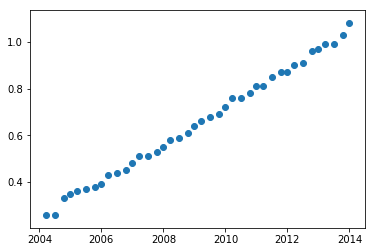

VShape:  (40, 2)
(2, 2)
(2, 1)
The equation for this trend is: y = 0.0803244174759 x -160.729045261
The debt in 2050 will be: $ 3.93601056433  trillion dollars


In [109]:
# autograd wrapped numpy
from autograd import numpy as np

# import the dataset
csvname = 'datasets/student_debt_data.csv'
data = np.loadtxt(csvname,delimiter=',')

# cut into input/output data
x = data[0:1,:]
y = data[1:,:]

#Plot the raw data on a scatter plot
import matplotlib.pyplot as plt
figure = plt.figure()
plt.scatter(x,y)
plt.show()

#Assemble the matricies 
v1 = x[0]**0
v2 = x[0]**1
V = np.transpose(np.vstack((v1,v2)))
print('VShape: ',V.shape)

#Get Linear regression parameters
A = np.dot(np.transpose(V),V)
print(A.shape)
b = np.dot(np.transpose(V),np.transpose(y))
print(b.shape)

#solve the linear system
x = np.dot(np.linalg.inv(A),b)
print('The equation for this trend is: y =',x[1][0],'x',x[0][0])

year = 2050
out = x[1][0]*year + x[0][0]

print('The debt in 2050 will be: $', out,' trillion dollars')


#### Problem 7

Recognize handwriting using scikit library and do matching using minibatch gradient descent methods. 


In [112]:
# load in data
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

# strip off input / output pairs
x = mnist.data.T
y = mnist.target[np.newaxis,:]

In [114]:
# sample indices
num_sample = 50000
inds = np.random.permutation(y.shape[1])[:num_sample]
x_sample = x[:,inds]
y_sample = y[:,inds]

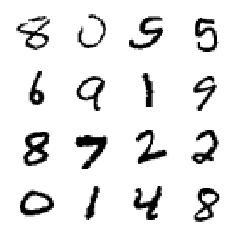

In [115]:
from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10,4))
gs=GridSpec(4,10)

for i in range(0, 16):
    fig.add_subplot(gs[i%4 + int(i/4)*10])
    plt.imshow(np.max(x_sample[:,i]) - np.reshape(x_sample[:,i],(28,28)), cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.axis('off') 
plt.show()

In [116]:
# compute C linear combinations of input point, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# multiclass perceptron
def multiclass_perceptron(w,x,y,iter):
    # get subset of points
    x_p = x[:,iter]
    y_p = y[:,iter]

    # pre-compute predictions on all points
    all_evals = model(x_p,w)

    # compute maximum across data points
    a =  np.max(all_evals,axis = 0)        

    # compute cost in compact form using numpy broadcasting
    b = all_evals[y_p.astype(int).flatten(),np.arange(np.size(y_p))]
    cost = np.sum(a - b)

    # return average
    return cost/float(np.size(y_p))

In [117]:
#Define some matric
N = x_sample.shape[0]
C = len(np.unique(y_sample))
w = 0.1*np.random.randn(N+1,C)
print (w.shape)

(785, 10)
